1. ÌååÏùº ÏóÖÎ°úÎìú Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [2]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
# Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë ÏóÜÏù¥ Ìè∞Ìä∏ Ï†ÅÏö©
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [4]:
# ÏÑ§ÏπòÎêú ÎÇòÎàî Ìè∞Ìä∏ Í≤ΩÎ°ú Ï∞æÍ∏∞
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)  # Ìè∞Ìä∏ Îì±Î°ù
plt.rc('font', family='NanumGothic')  # Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï

In [5]:
!pip install dask[dataframe]

In [6]:
!pip install optuna

In [7]:
import pandas as pd
import plotly.express as px
import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250414 ·Ñë·ÖÆ·ÜØ·ÑÜ·ÖÆ·Ñã·ÖØ·Ü´ ·ÑÄ·Öµ·Ü∑·Ñé·Öµ ·Ñí·Ö™·ÜØ·Ñâ·Ö•·Üº·Ñí·Ö™ ·ÑÄ·Öµ·Ñí·Ö¨·Ü® ·ÑÜ·Ö¢·Ñé·ÖÆ·ÜØ ·Ñã·Ö®·Ñé·Ö≥·Ü® ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/Pulmuone_Kimchi_Sales_Data_Preprocessing.csv')

In [8]:
print("Train data length:", len(df))

Train data length: 62352


2. EDA

In [9]:
df.head(10)

ÎÇ†Ïßú                 ÌíàÎ™©           ÌåêÎß§ÏΩîÎìú  ÌåêÎß§Í∞ÄÍ≤©   Í∂åÏó≠        ÏßÄÏ†ê      ÌååÌä∏  \
0  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
1  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
2  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
3  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
4  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
5  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
6  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
7  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
8  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   
9  2020-06-01  ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg  8801114143353  9160  ÏàòÎèÑÍ∂å  ÏãùÌíà_KA1ÏßÄÏ†ê  KA1_Í∞ïÎèô   

           Îß§Ïû•Î™Ö  Ï†êÌè¨ÏΩîÎìú  Zone Ïó¨Î∂Ä  ÌôçÎ≥¥ÏùºÏàò Î™©ÌëúÏàòÎüâ      Îã¨ÏÑ±Ïú®  ÌåêÎß§ÏàòÎüâ  ÌåêÎß§Í∏àÏï°  
0   [ÌòÑ]Ïù¥ÎßàÌä∏ÏÑ±ÎÇ®Ï†êH  1133        0     0   35   71.80%     0    -   
1   [ÌòÑ]Ïù¥ÎßàÌä∏Í∞ÄÎì†5H  1140        1    23  177  156.40%     1  9160  
2  [ÌòÑ]Ïù¥ÎßàÌä∏Í≤ΩÍ∏∞Í¥ëÏ£ºH  1127        1    14  238  115.80%     0    -   
3    [ÌòÑ]Ïù¥ÎßàÌä∏Î¨µÎèôH  1139        0     0   39   49.10%     0    -   
4    [ÌòÑ]Ïù¥ÎßàÌä∏ÏÉÅÎ¥âH  1029        0     0   51   35.20%     0    -   
5    [ÌòÑ]Ïù¥ÎßàÌä∏ÎèÑÎÜçH  1114        0     0   42   54.40%     0    -   
6    [ÌòÑ]Ïù¥ÎßàÌä∏Î≥ÑÎÇ¥H  1155        0     0   49   67.10%     0    -   
7    [ÌòÑ]Ïù¥ÎßàÌä∏ÏßÑÏ†ëH  1136        0     0   -     0.00%     0    -   
8   [ÌòÑ]Ïù¥ÎßàÌä∏ÎÇ®ÏñëÏ£ºH  1094        0     0   64   47.10%     0    -   
9    [ÌòÑ]Ïù¥ÎßàÌä∏Î™ÖÏùºH  1062        0     0   72   65.30%     0    -

In [10]:
df.tail()

ÎÇ†Ïßú                    ÌíàÎ™©           ÌåêÎß§ÏΩîÎìú  ÌåêÎß§Í∞ÄÍ≤©   Í∂åÏó≠      ÏßÄÏ†ê  \
62347  2020-06-30  ÌíÄÎ¨¥Ïõê Ïã§Ïò® Îì§Í∏∞Î¶Ñ Î≥∂ÏùåÍπÄÏπò 700g  8801114149850  6530  ÏßÄÎ∞©Í∂å  Ïú†ÌÜµÎ∂ÄÏÇ∞ÏßÄÏ†ê   
62348  2020-06-30  ÌíÄÎ¨¥Ïõê Ïã§Ïò® Îì§Í∏∞Î¶Ñ Î≥∂ÏùåÍπÄÏπò 700g  8801114149850  6530  ÏßÄÎ∞©Í∂å  Ïú†ÌÜµÎ∂ÄÏÇ∞ÏßÄÏ†ê   
62349  2020-06-30  ÌíÄÎ¨¥Ïõê Ïã§Ïò® Îì§Í∏∞Î¶Ñ Î≥∂ÏùåÍπÄÏπò 700g  8801114149850  6530  ÏßÄÎ∞©Í∂å  Ïú†ÌÜµÎ∂ÄÏÇ∞ÏßÄÏ†ê   
62350  2020-06-30  ÌíÄÎ¨¥Ïõê Ïã§Ïò® Îì§Í∏∞Î¶Ñ Î≥∂ÏùåÍπÄÏπò 700g  8801114149850  6530  ÏßÄÎ∞©Í∂å  Ïú†ÌÜµÎ∂ÄÏÇ∞ÏßÄÏ†ê   
62351  2020-06-30  ÌíÄÎ¨¥Ïõê Ïã§Ïò® Îì§Í∏∞Î¶Ñ Î≥∂ÏùåÍπÄÏπò 700g  8801114149850  6530  ÏßÄÎ∞©Í∂å  Ïú†ÌÜµÎ∂ÄÏÇ∞ÏßÄÏ†ê   

          ÌååÌä∏           Îß§Ïû•Î™Ö  Ï†êÌè¨ÏΩîÎìú  Zone Ïó¨Î∂Ä  ÌôçÎ≥¥ÏùºÏàò Î™©ÌëúÏàòÎüâ      Îã¨ÏÑ±Ïú®  ÌåêÎß§ÏàòÎüâ   ÌåêÎß§Í∏àÏï°  
62347  Ïú†ÌÜµÏÑúÎ∂ÄÏÇ∞     [ÌòÑ]Ïù¥ÎßàÌä∏ÏñëÏÇ∞H  1080        0     0  111   60.30%     0     -   
62348  Ïú†ÌÜµÏÑúÎ∂ÄÏÇ∞  [ÌòÑ]Ïù¥ÎßàÌä∏ÍπÄÌï¥ÌÑ∞ÎØ∏ÎÑêH  1162        1    14  128  152.90%     0     -   
62349  Ïú†ÌÜµÏ§ëÎ∂ÄÏÇ∞     [ÌòÑ]Ïù¥ÎßàÌä∏Í∏àÏ†ïH  1069        0     0   43   59.90%     2  13060  
62350  Ïú†ÌÜµÏ§ëÎ∂ÄÏÇ∞     [ÌòÑ]Ïù¥ÎßàÌä∏Î¨∏ÌòÑH  1068        0     0   67   55.60%     0     -   
62351  Ïú†ÌÜµÏ§ëÎ∂ÄÏÇ∞     [ÌòÑ]Ïù¥ÎßàÌä∏Ïó∞Ï†úH  1052        0     0   47  102.80%     0     -

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62352 entries, 0 to 62351
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ÎÇ†Ïßú       62352 non-null  object
 1   ÌíàÎ™©       62352 non-null  object
 2   ÌåêÎß§ÏΩîÎìú     62352 non-null  int64 
 3   ÌåêÎß§Í∞ÄÍ≤©     62352 non-null  int64 
 4   Í∂åÏó≠       62352 non-null  object
 5   ÏßÄÏ†ê       62352 non-null  object
 6   ÌååÌä∏       62352 non-null  object
 7   Îß§Ïû•Î™Ö      62352 non-null  object
 8   Ï†êÌè¨ÏΩîÎìú     62352 non-null  int64 
 9   Zone Ïó¨Î∂Ä  62352 non-null  int64 
 10  ÌôçÎ≥¥ÏùºÏàò     62352 non-null  int64 
 11  Î™©ÌëúÏàòÎüâ     62352 non-null  object
 12  Îã¨ÏÑ±Ïú®      62352 non-null  object
 13  ÌåêÎß§ÏàòÎüâ     62352 non-null  int64 
 14  ÌåêÎß§Í∏àÏï°     62352 non-null  object
dtypes: int64(6), object(9)
memory usage: 7.1+ MB


In [15]:
# 1. Í∏∞Î≥∏ EDA: Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥ Íµ¨Ï°∞ ÌååÏïÖ
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])

# ÏùºÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏù∏ (Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ Ïó¨Î∂Ä)
print(df['ÎÇ†Ïßú'].nunique())  # 30ÏùºÏù¥ Î™®Îëê ÏûàÎäîÏßÄ ÌôïÏù∏

# Îß§Ïû• Ïàò, ÌíàÎ™© Ïàò
print(df['Îß§Ïû•Î™Ö'].nunique())
print(df['ÌíàÎ™©'].value_counts())

31
144
ÌíàÎ™©
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1.5kg         4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ìè¨Í∏∞ÍπÄÏπò 3.3kg         4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ï¥ùÍ∞ÅÍπÄÏπò 400g          4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Î∞±ÍπÄÏπò 400g           4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 1kg           4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïç∞ÏùÄÍπÄÏπò 400g          4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïó¥Î¨¥ÍπÄÏπò 400g          4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ï†ÑÎùºÎèÑÏãù Ïç∞ÏùÄÍπÄÏπò 900g     4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ï†ÑÎùºÎèÑÏãù Ìè¨Í∏∞ÍπÄÏπò 3.2kg    4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ìè¨Í∏∞ÍπÄÏπò 1.5kg         4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ìè¨Í∏∞ÍπÄÏπò 1kg           4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ï¥ùÍ∞ÅÍπÄÏπò 1.4kg         4464
ÌíÄÎ¨¥Ïõê ÌÜ°ÌÜ° Ïó¥Î¨¥ÍπÄÏπò 1.4kg         4464
ÌíÄÎ¨¥Ïõê Ïã§Ïò® Îì§Í∏∞Î¶Ñ Î≥∂ÏùåÍπÄÏπò 700g      4320
Name: count, dtype: int64


In [16]:
# 2. Í≤∞Ï∏°Ïπò Î∞è Ïù¥ÏÉÅÏπò ÌôïÏù∏
df.isnull().sum()  # ÌòπÏãúÎùºÎèÑ Îπ†ÏßÑ Í∞íÏù¥ ÏûàÎäîÏßÄ

# ÌåêÎß§ÏàòÎüâ/ÌåêÎß§Í∏àÏï° Ï§ë ÏùåÏàòÎÇò Ïù¥ÏÉÅÍ∞í ÌôïÏù∏
df[['ÌåêÎß§ÏàòÎüâ', 'ÌåêÎß§Í∏àÏï°']].describe()

ÌåêÎß§ÏàòÎüâ
count  62352.000000
mean       0.178134
std        0.687988
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       20.000000

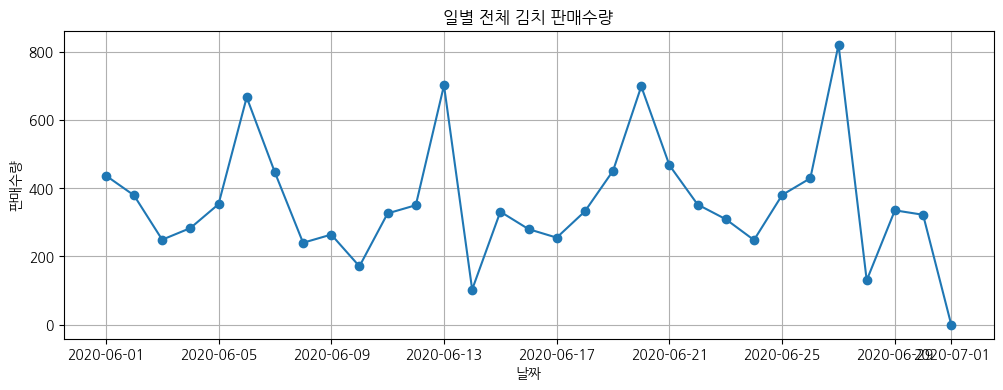

In [17]:
# 3. ÎÇ†ÏßúÎ≥Ñ Ï†ÑÏ≤¥ ÌåêÎß§Îüâ Ìä∏Î†åÎìú (ÏãúÍ≥ÑÏó¥ Í∏∞Ï¥à ÌôïÏù∏)
daily_sales = df.groupby('ÎÇ†Ïßú')['ÌåêÎß§ÏàòÎüâ'].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(daily_sales['ÎÇ†Ïßú'], daily_sales['ÌåêÎß§ÏàòÎüâ'], marker='o')
plt.title('ÏùºÎ≥Ñ Ï†ÑÏ≤¥ ÍπÄÏπò ÌåêÎß§ÏàòÎüâ')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÌåêÎß§ÏàòÎüâ')
plt.grid(True)
plt.show()

In [18]:
# 4. Îß§Ïû•Î≥Ñ ÌåêÎß§ Ìä∏Î†åÎìú Ìé∏Ï∞® ÌôïÏù∏ (ÏÉÅÏúÑ/ÌïòÏúÑ Îß§Ïû•)
top_stores = df.groupby('Îß§Ïû•Î™Ö')['ÌåêÎß§ÏàòÎüâ'].sum().sort_values(ascending=False).head(10)
bottom_stores = df.groupby('Îß§Ïû•Î™Ö')['ÌåêÎß§ÏàòÎüâ'].sum().sort_values(ascending=True).head(10)

print("ÌåêÎß§Îüâ ÏÉÅÏúÑ Îß§Ïû•:")
print(top_stores)

print("\nÌåêÎß§Îüâ ÌïòÏúÑ Îß§Ïû•:")
print(bottom_stores)

ÌåêÎß§Îüâ ÏÉÅÏúÑ Îß§Ïû•:
Îß§Ïû•Î™Ö
[ÌòÑ]Ïù¥ÎßàÌä∏Í∞ÄÏñëH      447
[ÌòÑ]Ïù¥ÎßàÌä∏Ï≤≠Ï£ºH      412
[ÌòÑ]Ïù¥ÎßàÌä∏ÏõîÎ∞∞H      388
[ÌòÑ]Ïù¥ÎßàÌä∏ÌååÏ£ºÏö¥Ï†ïH    375
[ÌòÑ]Ïù¥ÎßàÌä∏ÏÇ∞Î≥∏H      371
[ÌòÑ]Ïù¥ÎßàÌä∏Ïó¨ÏàòH      347
[ÌòÑ]Ïù¥ÎßàÌä∏ÎØ∏ÏïÑH      302
[ÌòÑ]Ïù¥ÎßàÌä∏ÏõîÍ≥ÑH      287
[ÌòÑ]Ïù¥ÎßàÌä∏Í∞ÄÎì†5H     277
[ÌòÑ]Ïù¥ÎßàÌä∏ÏàúÏ≤úH      276
Name: ÌåêÎß§ÏàòÎüâ, dtype: int64

ÌåêÎß§Îüâ ÌïòÏúÑ Îß§Ïû•:
Îß§Ïû•Î™Ö
[ÌòÑ]Ïù¥ÎßàÌä∏ÏãúÏßÄH      0
[ÌòÑ]Ïù¥ÎßàÌä∏ÎèôÍ¥ëÏ£ºH     0
[ÌòÑ]Ïù¥ÎßàÌä∏ÌïôÏÑ±H      0
[ÌòÑ]Ïù¥ÎßàÌä∏ÏÉÅÎ¨¥H      0
[ÌòÑ]Ïù¥ÎßàÌä∏ÏÑúÎ∂ÄÏÇ∞H     0
[ÌòÑ]Ïù¥ÎßàÌä∏Ïã†ÏõîH      6
[ÌòÑ]Ïù¥ÎßàÌä∏Ïù∏Ï≤úÍ≥µÌï≠H    7
[ÌòÑ]Ïù¥ÎßàÌä∏ÏßÑÏ†ëH      7
[ÌòÑ]Ïù¥ÎßàÌä∏ÏÇ¨ÏÉÅH      8
[ÌòÑ]Ïù¥ÎßàÌä∏ÎÇ®ÏõêH      9
Name: ÌåêÎß§ÏàòÎüâ, dtype: int64


<Axes: title={'center': 'Zone Íµ¨ÏÑ± Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ'}, xlabel='Zone Ïó¨Î∂Ä'>

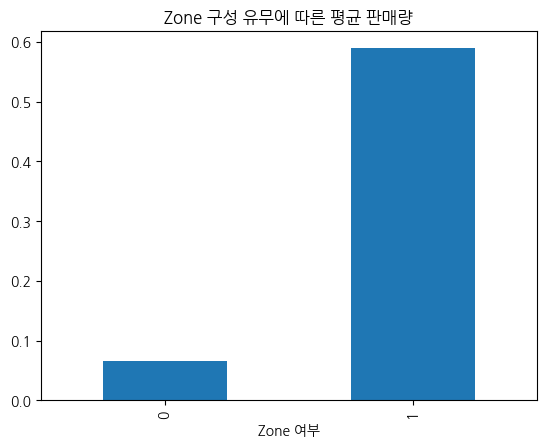

In [19]:
# 5. Zone Íµ¨ÏÑ± Ïú†Î¨¥ / ÌåêÏ¥âÏÇ¨Ïõê Ìà¨ÏûÖ / Î™©ÌëúÏàòÎüâÏùò ÏòÅÌñ•ÎèÑ ÏãúÍ∞ÅÌôî

# (1) Zone Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ ÎπÑÍµê

zone_sales = df.groupby('Zone Ïó¨Î∂Ä')['ÌåêÎß§ÏàòÎüâ'].mean()
zone_sales.plot(kind='bar', title='Zone Íµ¨ÏÑ± Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ')

Text(0.5, 1.0, 'ÌôçÎ≥¥ÏùºÏàòÏôÄ ÌåêÎß§ÏàòÎüâ Í¥ÄÍ≥Ñ')

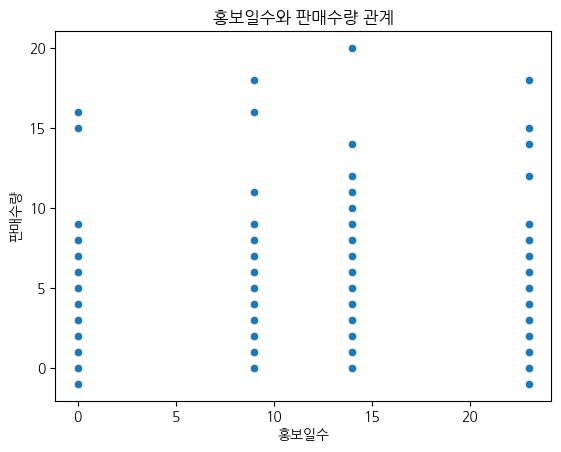

In [20]:
# (2) ÌôçÎ≥¥ÏùºÏàòÏóê Îî∞Î•∏ ÌåêÎß§Îüâ Í¥ÄÍ≥Ñ

import seaborn as sns
sns.scatterplot(data=df, x='ÌôçÎ≥¥ÏùºÏàò', y='ÌåêÎß§ÏàòÎüâ')
plt.title('ÌôçÎ≥¥ÏùºÏàòÏôÄ ÌåêÎß§ÏàòÎüâ Í¥ÄÍ≥Ñ')

Text(0.5, 1.0, 'Î™©ÌëúÏàòÎüâ vs Ïã§Ï†ú ÌåêÎß§ÏàòÎüâ')

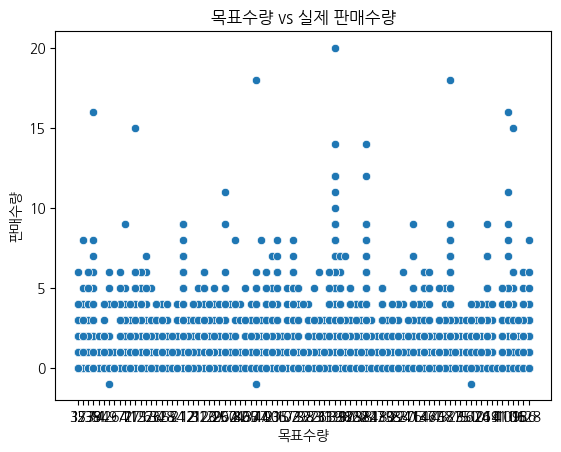

In [21]:
# (3) Î™©ÌëúÏàòÎüâÍ≥º Ïã§Ï†ú ÌåêÎß§Îüâ ÎπÑÍµê

sns.scatterplot(data=df, x='Î™©ÌëúÏàòÎüâ', y='ÌåêÎß§ÏàòÎüâ')
plt.title('Î™©ÌëúÏàòÎüâ vs Ïã§Ï†ú ÌåêÎß§ÏàòÎüâ')

<Axes: title={'center': 'ÏöîÏùºÎ≥Ñ Ï¥ù ÌåêÎß§ÏàòÎüâ'}, xlabel='ÏöîÏùº'>

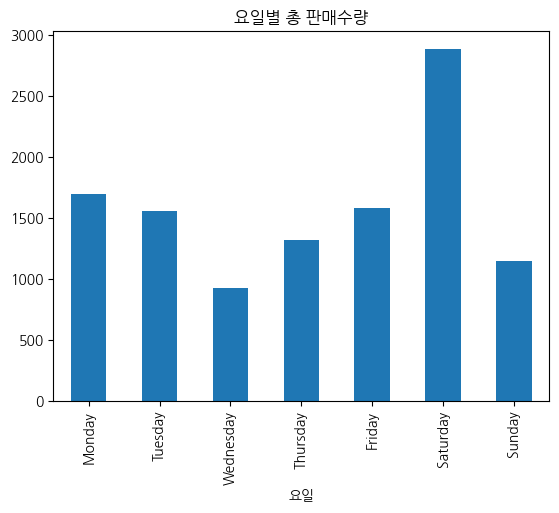

In [22]:
# 6. ÏöîÏùºÎ≥Ñ Ìå®ÌÑ¥ ÌôïÏù∏ (ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°Ïóê Ï§ëÏöî)

df['ÏöîÏùº'] = df['ÎÇ†Ïßú'].dt.day_name()
weekday_sales = df.groupby('ÏöîÏùº')['ÌåêÎß§ÏàòÎüâ'].sum()
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekday_sales.plot(kind='bar', title='ÏöîÏùºÎ≥Ñ Ï¥ù ÌåêÎß§ÏàòÎüâ')

<Axes: title={'center': 'ÌååÌä∏Î≥Ñ Ï¥ù ÌåêÎß§ÏàòÎüâ'}, ylabel='ÌååÌä∏'>

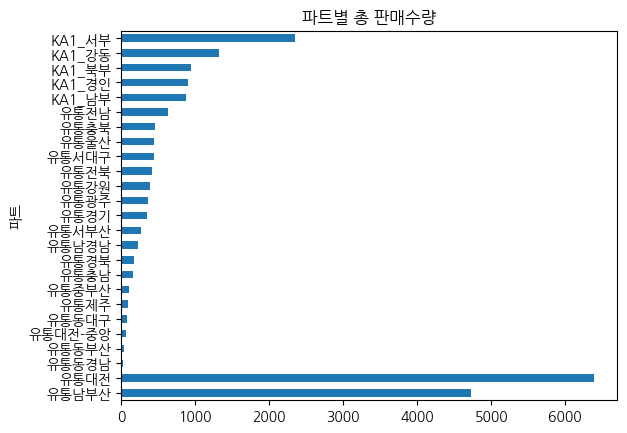

In [23]:
# 7. ÌååÌä∏ / Í∂åÏó≠ / ÏßÄÏ†ê Îã®ÏúÑ Î∂ÑÏÑù (ÏßÄÏó≠Î≥Ñ ÏòÅÌñ•)

region_sales = df.groupby('Í∂åÏó≠')['ÌåêÎß§ÏàòÎüâ'].sum().sort_values()
region_sales.plot(kind='barh', title='Í∂åÏó≠Î≥Ñ Ï¥ù ÌåêÎß§ÏàòÎüâ')

part_sales = df.groupby('ÌååÌä∏')['ÌåêÎß§ÏàòÎüâ'].sum().sort_values()
part_sales.plot(kind='barh', title='ÌååÌä∏Î≥Ñ Ï¥ù ÌåêÎß§ÏàòÎüâ')

# **-> ['ÎÇ†Ïßú', 'ÌíàÎ™©', 'ÌåêÎß§Í∞ÄÍ≤©', 'Í∂åÏó≠', 'ÏßÄÏ†ê', 'ÌååÌä∏', 'Îß§Ïû•Î™Ö', 'ZoneÏó¨Î∂Ä', 'ÌôçÎ≥¥ÏùºÏàò', 'Î™©ÌëúÏàòÎüâ'] ÏÇ¨Ïö©**

# **3. Ï†ÑÏ≤òÎ¶¨ Î∞è ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ**

In [11]:
# 1. ÎÇ†Ïßú Ï≤òÎ¶¨
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])
df = df.sort_values(by='ÎÇ†Ïßú')

# 2. ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
df['ÏöîÏùº'] = df['ÎÇ†Ïßú'].dt.dayofweek             # Ïõî=0, Ïùº=6
df['Ï£ºÎßêÏó¨Î∂Ä'] = df['ÏöîÏùº'].apply(lambda x: 1 if x >= 5 else 0)

# 3. Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©
cat_cols = ['ÌíàÎ™©', 'Í∂åÏó≠', 'ÏßÄÏ†ê', 'ÌååÌä∏', 'Îß§Ïû•Î™Ö']
for col in cat_cols:
    le = LabelEncoder()
    df[col + '_ÏΩîÎìú'] = le.fit_transform(df[col])

In [12]:
# 4. Ïà´ÏûêÌòï Î≥ÄÏàò Ï†ÑÏ≤òÎ¶¨
df['ÌåêÎß§Í∞ÄÍ≤©'] = pd.to_numeric(df['ÌåêÎß§Í∞ÄÍ≤©'].astype(str).str.replace(',', ''), errors='coerce')
df['Î™©ÌëúÏàòÎüâ'] = pd.to_numeric(df['Î™©ÌëúÏàòÎüâ'].astype(str).str.replace(',', ''), errors='coerce')
df['ÌåêÎß§Í∏àÏï°'] = pd.to_numeric(df['ÌåêÎß§Í∏àÏï°'].astype(str).str.replace(',', '').replace('-', '0'), errors='coerce')

In [13]:
# 5. ÏÇ¨Ïö© Î≥ÄÏàò ÏÑ§Ï†ï
features = [
    'ÌåêÎß§Í∞ÄÍ≤©', 'ÌôçÎ≥¥ÏùºÏàò', 'Î™©ÌëúÏàòÎüâ', 'Zone Ïó¨Î∂Ä',
    'ÏöîÏùº', 'Ï£ºÎßêÏó¨Î∂Ä',
    'ÌíàÎ™©_ÏΩîÎìú', 'Í∂åÏó≠_ÏΩîÎìú', 'ÏßÄÏ†ê_ÏΩîÎìú', 'ÌååÌä∏_ÏΩîÎìú', 'Îß§Ïû•Î™Ö_ÏΩîÎìú'
]
target = 'ÌåêÎß§Í∏àÏï°'

In [14]:
# 6. Train / Test Î∂ÑÌï† (ÎÇ†Ïßú Í∏∞Ï§Ä)
train = df[df['ÎÇ†Ïßú'] <= df['ÎÇ†Ïßú'].min() + pd.Timedelta(days=20)]  # 1~21Ïùº
test = df[df['ÎÇ†Ïßú'] > df['ÎÇ†Ïßú'].min() + pd.Timedelta(days=20)]   # 22~30Ïùº

X_train = train[features].copy()
y_train = train[target].copy()
X_test = test[features].copy()
y_test = test[target].copy()

In [15]:
# 7. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
train_mask = X_train.notnull().all(axis=1) & y_train.notnull()
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = X_test.notnull().all(axis=1) & y_test.notnull()
X_test = X_test[test_mask]
y_test = y_test[test_mask]

5. Modeling

In [16]:
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
# 8. ÏòàÏ∏° + ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [19]:
print(f"üìä MAE: {mae:.2f}")
print(f"üìä RMSE: {rmse:.2f}")

üìä MAE: 7289.07
üìä RMSE: 12038.97


ÏóîÏßÄÎãàÏñ¥ÎßÅ ÌõÑ ÏãúÍ∞ÅÌôî

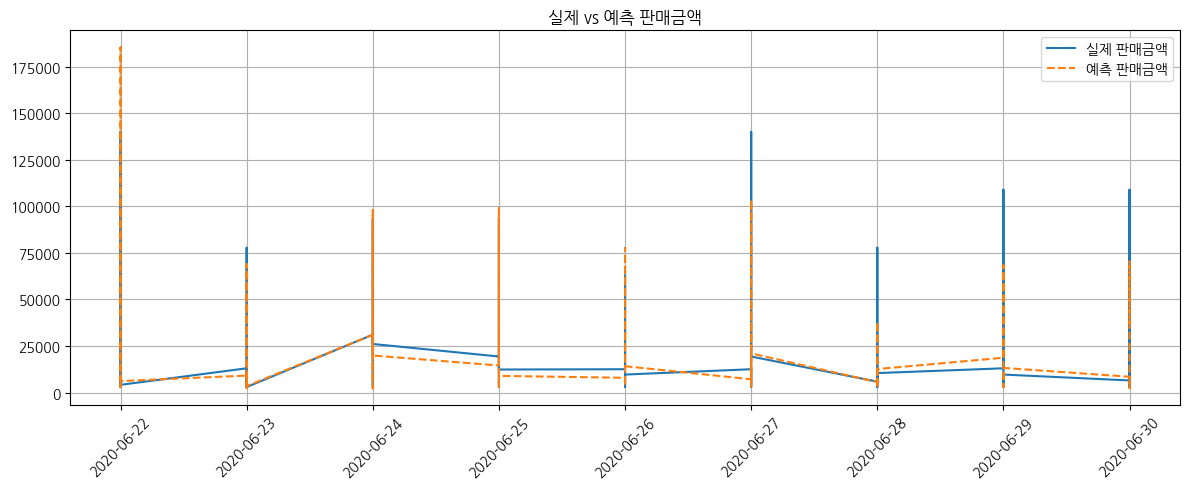

In [20]:
# 12. ÏãúÍ∞ÅÌôî - Ïã§Ï†ú vs ÏòàÏ∏°
plt.figure(figsize=(12, 5))
plt.plot(test.loc[test_mask, 'ÎÇ†Ïßú'], y_test.values, label='Ïã§Ï†ú ÌåêÎß§Í∏àÏï°')
plt.plot(test.loc[test_mask, 'ÎÇ†Ïßú'], y_pred, label='ÏòàÏ∏° ÌåêÎß§Í∏àÏï°', linestyle='--')
plt.title('Ïã§Ï†ú vs ÏòàÏ∏° ÌåêÎß§Í∏àÏï°')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

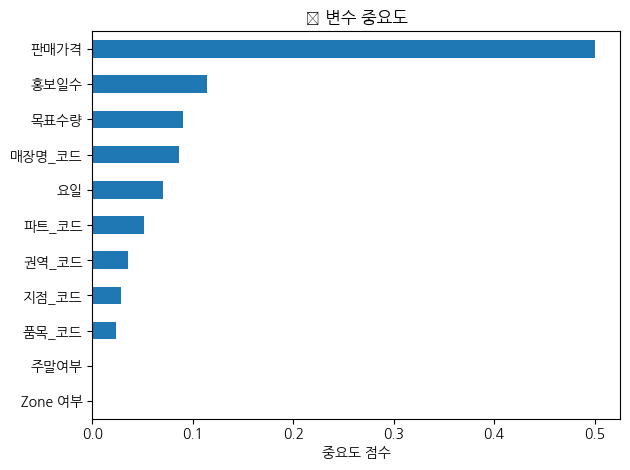

In [21]:
# 13. Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title='üìå Î≥ÄÏàò Ï§ëÏöîÎèÑ')
plt.xlabel('Ï§ëÏöîÎèÑ Ï†êÏàò')
plt.tight_layout()
plt.show()

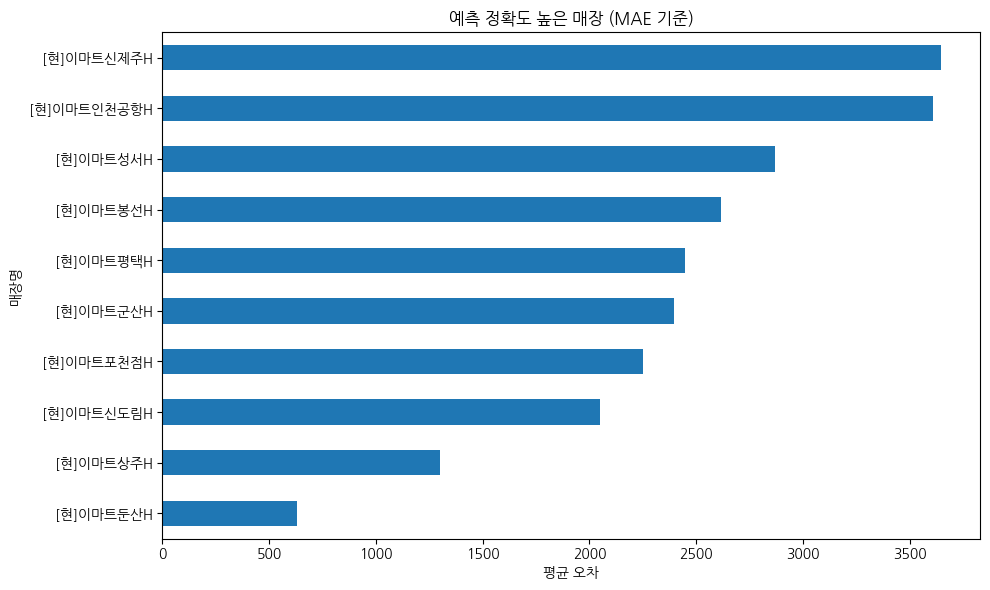

In [23]:
# 14. Îß§Ïû•Î≥Ñ ÏòàÏ∏° Ïò§Ï∞® Î∂ÑÏÑù
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞Îêú test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎßå ÏòàÏ∏°Í∞í Î∂ôÏù¥Í∏∞
test_valid = test.loc[test_mask].copy()
test_valid['ÏòàÏ∏°'] = y_pred
test_valid['Ïò§Ï∞®'] = test_valid['ÏòàÏ∏°'] - y_test.values  # ÎòêÎäî test_valid['ÌåêÎß§Í∏àÏï°']

# Îß§Ïû•Î≥Ñ MAE Í≥ÑÏÇ∞
store_mae = test_valid.groupby('Îß§Ïû•Î™Ö')['Ïò§Ï∞®'].apply(lambda x: np.mean(np.abs(x)))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
store_mae.sort_values().head(10).plot(kind='barh', title='ÏòàÏ∏° Ï†ïÌôïÎèÑ ÎÜíÏùÄ Îß§Ïû• (MAE Í∏∞Ï§Ä)')
plt.xlabel('ÌèâÍ∑† Ïò§Ï∞®')
plt.tight_layout()
plt.show()